In [15]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from collections import Counter
from optparse import OptionParser
import argparse
import matplotlib.pyplot as plt
import inspect

## Достаём данные

In [51]:
from collections import defaultdict

strain_counts = defaultdict(int)

with open('./specialists/Enterobacter_hormaechei_pan_50.proteinortho', 'r') as file:
    
    # Skip first line 
    next(file)
    
    for line in file:
        words = line.split("\t")
        
        if len(words) > 3:
            # Extract strain count 
            strain = int(words[0])
            
            # Increment count for this strain
            strain_counts[strain] += 1
            
print(strain_counts)

defaultdict(<class 'int'>, {24: 70, 29: 52, 34: 17, 6: 344, 43: 17, 23: 75, 22: 67, 31: 29, 10: 231, 41: 18, 28: 37, 20: 60, 59: 2531, 5: 435, 25: 61, 21: 42, 60: 196, 2: 1195, 7: 331, 27: 36, 19: 51, 26: 30, 46: 18, 11: 91, 8: 174, 58: 601, 9: 201, 40: 13, 13: 84, 12: 90, 33: 14, 48: 17, 35: 14, 18: 33, 37: 14, 56: 70, 32: 23, 53: 28, 57: 184, 54: 26, 55: 37, 17: 41, 49: 18, 42: 13, 52: 13, 50: 18, 30: 24, 39: 18, 51: 14, 45: 12, 14: 66, 15: 60, 4: 432, 16: 90, 47: 21, 36: 21, 44: 8, 38: 9, 3: 563})


## По координатам стоим кривую

Text(0, 0.5, 'Number of orthologs')

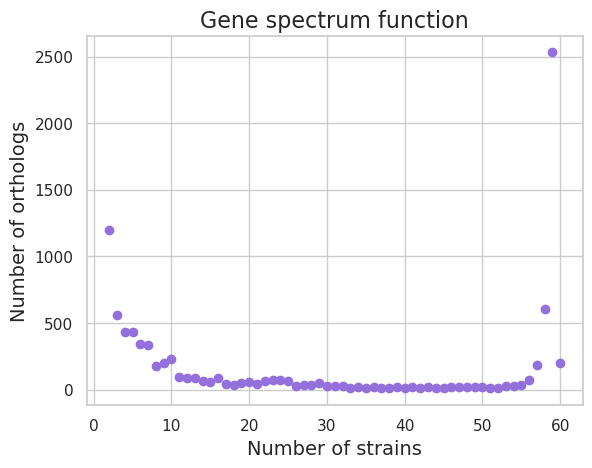

In [52]:
# Sort dictionary items by key to get coordinates 
coords = sorted(strain_counts.items())  

# Unpack coordinates into separate lists
x_coords, y_coords = zip(*coords)

# Plot scatter plot  
plt.scatter(x_coords, y_coords, color='mediumpurple')

# Add plot labels and title
plt.title("Gene spectrum function", fontsize=16) 
plt.xlabel("Number of strains", fontsize=14)
plt.ylabel("Number of orthologs", fontsize=14)

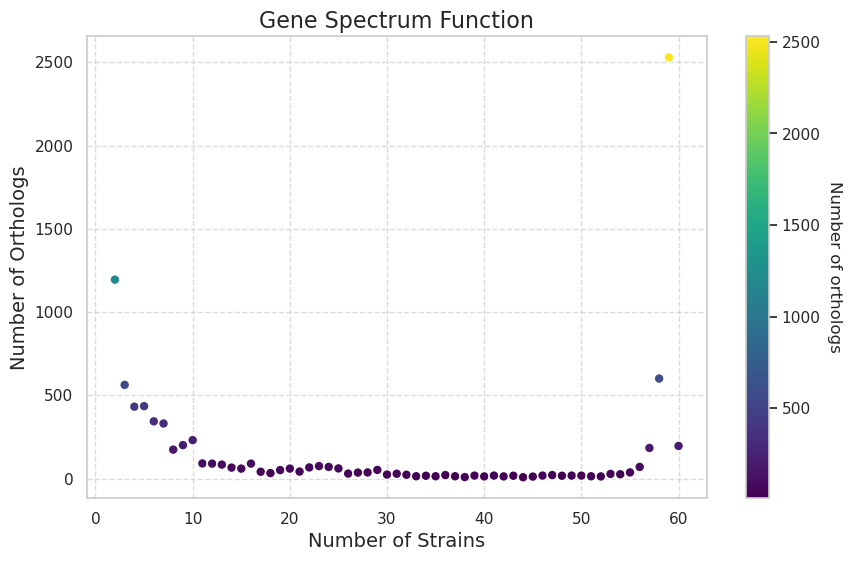

In [53]:
import seaborn as sns

# Use Seaborn style
sns.set(style="whitegrid")

# Sort dictionary items by key to get coordinates 
coords = sorted(strain_counts.items())  

# Unpack coordinates into separate lists
x_coords, y_coords = zip(*coords)

# Plot scatter plot  
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_coords, y_coords, c=y_coords, cmap='viridis', edgecolors='w', s=50)

# Add colorbar for better interpretation
cbar = plt.colorbar(scatter)
cbar.set_label('Number of orthologs', rotation=270, labelpad=15)

# Add plot labels and title
plt.title("Gene Spectrum Function", fontsize=16) 
plt.xlabel("Number of Strains", fontsize=14)
plt.ylabel("Number of Orthologs", fontsize=14)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()


## Аппроксимируем

In [54]:
x_data = np.array(x_coords)  # переводим в массивы так как дальше работаем с нампаем
y_data = np.array(y_coords)

# формула суммы трёх экспонент
def func_exp(x, a1, b1, a2, b2, a3, b3):
    return np.exp(x * a1 + b1) + \
           np.exp(x * a2 + b2) +  \
           np.exp(x * a3 + b3)


# фомула суммы двух степенных функций
def func_pwr(x, a1, b1, a2, b2):
    return a1 * np.power(x + 1, b1) + \
           a2 * np.power(183 - x, b2)

/tmp/ipykernel_2259424/2366836856.py:6: RuntimeWarning: overflow encountered in exp
  return np.exp(x * a1 + b1) + \


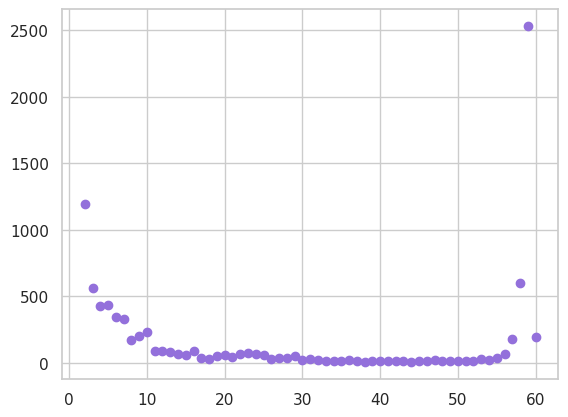

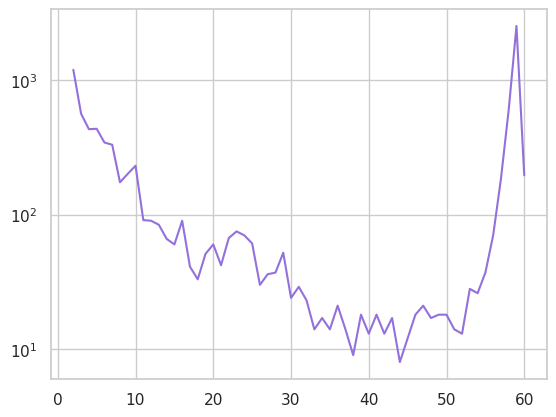

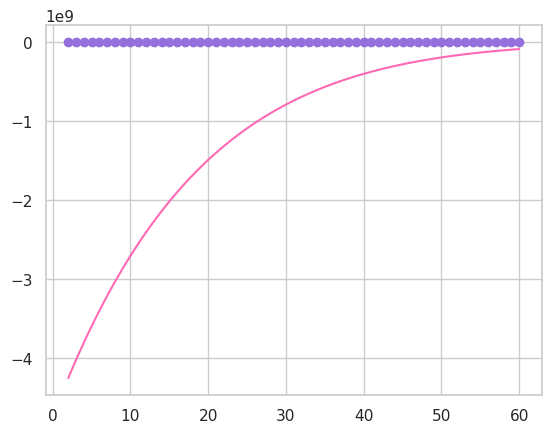

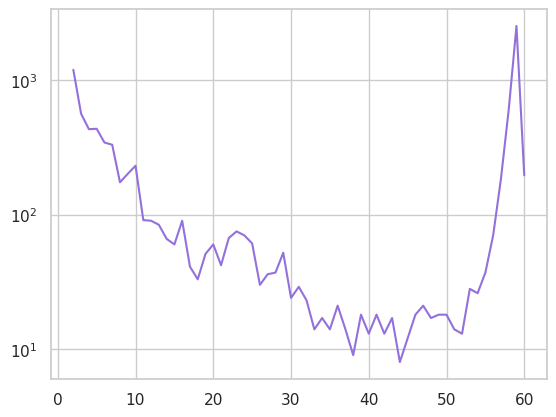

NameError: name 'IC' is not defined

In [55]:
# аппроксимируем для экспоненты
x = x_data
y = y_data
p0 = [-1, 1000, -1, 1, 10, 1]
popt_exp, pcov = curve_fit(func_exp, x, y, p0)
# аппрокимируем для степенной функции
# подбираем параметры, чтобы органичить множество возможных подстановок
p0 = [-10, 1, 10, 10]
popt_pwr, pcov = curve_fit(func_pwr, x, y, p0)
# находим координаты для аппроксимаций
x_app = np.linspace(min(x), max(x))
y_app_exp = func_exp(x_app, *popt_exp)
# рисуем
plt.plot(x_app, y_app_exp)
plt.scatter(x, y, color='mediumpurple')
plt.show()
plt.semilogy(x_app, y_app_exp)
plt.semilogy(x, y, color='mediumpurple')
plt.show()
# повторяем всё для степенной
x_app = np.linspace(min(x), max(x))
y_app_pwr = func_pwr(x_app, *popt_pwr)
# рисуем
plt.plot(x_app, y_app_pwr, color='hotpink')
plt.scatter(x, y, color='mediumpurple')
plt.show()
plt.semilogy(x_app, y_app_pwr, color='hotpink')
plt.semilogy(x, y, color='mediumpurple')
plt.show()
# смотрим, насколько наши аппроксимации отличаются от кривой
y_observed = y_data
y_predicted_exp = func_exp(x, *popt_exp)
y_predicted_pwr = func_pwr(x, *popt_pwr)
N_params_exp = len(popt_exp)
N_params_pwr = len(popt_pwr)

print(IC(y_observed,
         y_predicted_exp,
         N_params_exp))

print(IC(y_observed,
         y_predicted_pwr,
         N_params_pwr))
# смотрим на графике на разницу
plt.plot(y_observed)
plt.plot(y_predicted_exp)
plt.show()
print(y)
print(y_app_exp)
for k in sorted(dic.keys()):
    print(k, dic[k])

In [56]:
x_data = np.array(x_coords)  # переводим в массивы так как дальше работаем с нампаем
y_data = np.array(y_coords)

def exp_sum_function(x, *params):
    result = 0
    for i in range(0, len(params), 2):
        result += np.exp(x * params[i] + params[i + 1])
    return result

def power_sum_function(x, *params):
    result = 0
    for i in range(0, len(params), 2):
        result += params[i] * np.power(x + 1, params[i + 1])
    return result


In [57]:
# аппроксимируем для экспоненты
popt_exp, pcov = curve_fit(exp_sum_function, x_data, y_data)

# подбираем параметры, чтобы органичить множество возможных подстановок
p0 = [-1, 1, -1, 1]
try:
    popt_exp, pcov_exp = curve_fit(exp_sum_function, x_data, y_data)
except ValueError as e:
    print("Error fitting exp_sum_function:", e)
    print("Initial guess p0:", p0)
    # print("Number of parameters expected by exp_sum_function:", len(inspect.signature(exp_sum_function).parameters) - 1)
    print("Signature of exp_sum_function:", inspect.signature(exp_sum_function))
    raise  # Reraise the exception to stop execution and investigate

# находим координаты для аппроксимаций
x_app = np.linspace(min(x_data), max(x_data))
y_app_exp = exp_sum_function(x_app, *popt_exp)

# рисуем
plt.plot(x_app, y_app_exp)
plt.scatter(x_data, y_data, color='mediumpurple')
plt.show()
plt.semilogy(x_app, y_app_exp)
plt.semilogy(x_data, y_data, color='mediumpurple')
plt.show()

# повторяем всё для степенной
x_app = np.linspace(min(x_data), max(x_data))
y_app_pwr = power_sum_function(x_app, *popt_pwr)

# рисуем
plt.plot(x_app, y_app_pwr, color='hotpink')
plt.scatter(x_data, y_data, color='mediumpurple')
plt.show()
plt.semilogy(x_app, y_app_pwr, color='hotpink')
plt.semilogy(x_data, y_data, color='mediumpurple')
plt.show()

# смотрим, насколько наши аппроксимации отличаются от кривой
y_observed = y_data
y_predicted_exp = exp_sum_function(x_data, *popt_exp)
y_predicted_pwr = power_sum_function(x_data, *popt_pwr)
N_params_exp = len(popt_exp)
N_params_pwr = len(popt_pwr)

print(IC(y_observed,
         y_predicted_exp,
         N_params_exp))

print(IC(y_observed,
         y_predicted_pwr,
         N_params_pwr))

# смотрим на графике на разницу
plt.plot(y_observed)
plt.plot(y_predicted_exp)
plt.show()
print(y_data)
print(y_app_exp)
for k in sorted(strain_counts.keys()):
    print(k, strain_counts[k])


ValueError: Unable to determine number of fit parameters.

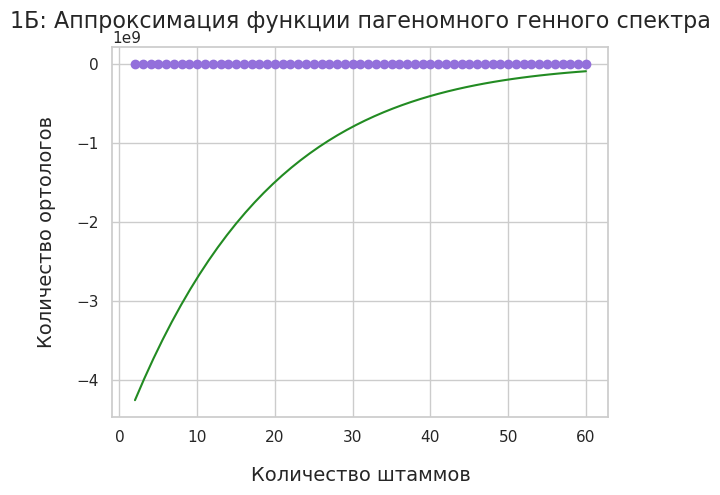

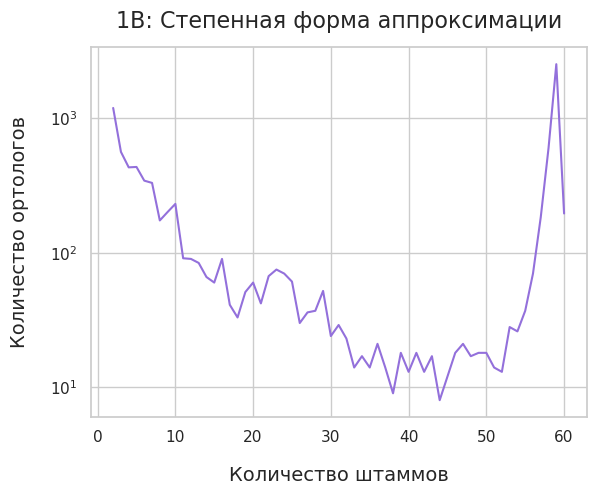

In [58]:
plt.plot(x_app, y_app_pwr, color='forestgreen')
plt.scatter(x, y, color='mediumpurple')
plt.title("1Б: Аппроксимация функции пагеномного генного спектра",
          fontsize=16, y=1.03)
plt.xlabel("Количество штаммов", fontsize=14, labelpad=15)
plt.ylabel("Количество ортологов", fontsize=14, labelpad=15)
plt.show()
plt.semilogy(x_app, y_app_pwr, color='forestgreen')
plt.semilogy(x, y, color='mediumpurple')
plt.title("1В: Степенная форма аппроксимации", fontsize=16, y=1.03)
plt.xlabel("Количество штаммов", fontsize=14, labelpad=15)
plt.ylabel("Количество ортологов", fontsize=14, labelpad=15)
plt.show()